<a href="https://www.kaggle.com/code/chandanarprasad/fortune-global-2000-companies-in-2021?scriptVersionId=100543559" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../input/fortune-global-2000-companies-till-2021/fortune_2000_in_2021.csv')
df.columns = df.columns.str.replace(' ','_')
df.columns

Index(['Rank', 'Name', 'Country', 'Sales', 'Profit', 'Assets', 'Market_Value'], dtype='object')

In [3]:
df.Sales = df.Sales.replace({'\$':'', 'B':'', 'M':'', ',':'',' ':''},regex=True).astype(float)
df.Profit = df.Profit.replace({'\$':'', 'B':'', 'M':'', ',':'',' ':''},regex=True).astype(float)
df.Assets = df.Assets.replace({'\$':'', 'B':'', 'M':'', ',':'',' ':''},regex=True).astype(float)
df.Market_Value = df.Market_Value.replace({'\$':'', 'B':'', 'M':'', ',':'',' ':''},regex=True).astype(float)

print('DataFrame Shape: ',df.shape)

df.head()

DataFrame Shape:  (2000, 7)


,Rank,Name,Country,Sales,Profit,Assets,Market_Value
0,1,ICBC,China,190.5,45.8,4914.7,249.5
1,2,JPMorgan Chase,United States,136.2,40.4,3689.3,464.8
2,3,Berkshire Hathaway,United States,245.5,42.5,873.7,624.4
3,4,China Construction Bank,China,173.5,39.3,4301.7,210.4
4,5,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,229.7,49.3,510.3,1897.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          2000 non-null   int64  
 1   Name          2000 non-null   object 
 2   Country       2000 non-null   object 
 3   Sales         2000 non-null   float64
 4   Profit        2000 non-null   float64
 5   Assets        1999 non-null   float64
 6   Market_Value  2000 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 109.5+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,2000.0,1000.313500,577.401900,1.0,500.75,1000.00,1500.25,1999.0
Sales,2000.0,38.742700,117.193676,1.0,5.00,10.50,22.10,960.0
Profit,2000.0,233.929950,362.654325,-997.2,1.50,88.00,516.40,996.2
Assets,1999.0,112.569135,346.731410,1.0,13.35,30.50,73.70,4914.7
Market_Value,2000.0,50.860900,139.966338,1.0,8.70,18.55,39.20,2252.3


In [6]:
df.shape[0],df.Name.nunique()

(2000, 2000)

In [7]:
df.Country.value_counts().head(10)

United States     590
China             291
Japan             215
United Kingdom     66
South Korea        62
Hong Kong          59
Canada             56
Germany            54
France             53
India              50
Name: Country, dtype: int64

In [8]:
df.Country.value_counts().tail(10)

Cyprus            1
Oman              1
Bahrain           1
Czech Republic    1
Kenya             1
Egypt             1
Peru              1
Monaco            1
Venezuela         1
Bangladesh        1
Name: Country, dtype: int64

## List of companies with profit higher than the mean of all the profits combined

In [9]:
df[df.Profit >np.mean(df.Profit)].head(10)

,Rank,Name,Country,Sales,Profit,Assets,Market_Value
209,210,EDF,France,78.7,741.0,374.3,44.4
261,262,Tesla,United States,31.5,690.0,52.1,710.1
274,275,Fiserv,United States,14.9,958.0,74.6,83.4
290,291,Dai-ichi Life Insurance,Japan,57.9,657.6,615.6,20.7
309,310,Deutsche Bank,Germany,35.4,566.6,1621.5,25.8
356,357,Johnson Controls International,Ireland,22.1,923.0,41.4,45.0
357,357,Woolworths,Australia,46.2,972.8,30.5,41.2
392,393,Starbucks,United States,23.2,664.8,30.0,139.3
400,400,Sompo,Japan,34.4,931.9,123.3,13.7
404,405,Saint-Gobain,France,43.5,519.8,59.5,33.8


## List of companies with assets higher than the mean of all the assets combined

In [10]:
df[df.Assets >np.mean(df.Assets)].head(10)

,Rank,Name,Country,Sales,Profit,Assets,Market_Value
0,1,ICBC,China,190.5,45.8,4914.7,249.5
1,2,JPMorgan Chase,United States,136.2,40.4,3689.3,464.8
2,3,Berkshire Hathaway,United States,245.5,42.5,873.7,624.4
3,4,China Construction Bank,China,173.5,39.3,4301.7,210.4
4,5,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,229.7,49.3,510.3,1897.2
5,6,Apple,United States,294.0,63.9,354.1,2252.3
6,6,Bank of America,United States,98.8,17.9,2832.2,336.3
7,6,Ping An Insurance Group,China,169.1,20.8,1453.8,211.2
8,9,Agricultural Bank of China,China,153.9,31.3,4159.9,140.1
9,10,Amazon,United States,386.1,21.3,321.2,1711.8


## List of companies with sales higher than the mean of all the sales combined

In [11]:
df[df.Sales >np.mean(df.Sales)].head(10)

,Rank,Name,Country,Sales,Profit,Assets,Market_Value
0,1,ICBC,China,190.5,45.8,4914.7,249.5
1,2,JPMorgan Chase,United States,136.2,40.4,3689.3,464.8
2,3,Berkshire Hathaway,United States,245.5,42.5,873.7,624.4
3,4,China Construction Bank,China,173.5,39.3,4301.7,210.4
4,5,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,229.7,49.3,510.3,1897.2
5,6,Apple,United States,294.0,63.9,354.1,2252.3
6,6,Bank of America,United States,98.8,17.9,2832.2,336.3
7,6,Ping An Insurance Group,China,169.1,20.8,1453.8,211.2
8,9,Agricultural Bank of China,China,153.9,31.3,4159.9,140.1
9,10,Amazon,United States,386.1,21.3,321.2,1711.8


In [12]:
df[df.Market_Value == df.Market_Value.max()]

,Rank,Name,Country,Sales,Profit,Assets,Market_Value
5,6,Apple,United States,294.0,63.9,354.1,2252.3


In [13]:
df[df.Market_Value == df.Market_Value.min()]

,Rank,Name,Country,Sales,Profit,Assets,Market_Value
1584,1585,Sparebanken Nord-Norge,Norway,481.0,2.0,13.7,1.0
1653,1653,North Pacific Bank,Japan,1.3,87.8,111.8,1.0
1700,1701,PSG Group,South Africa,1.0,1.7,1.1,1.0
1715,1716,Daishi Hokuetsu Financial Group,Japan,1.4,89.5,92.7,1.0
1886,1886,Liberbank,Spain,940.0,46.7,58.1,1.0


In [14]:
df[df.Market_Value > df.Market_Value.mean()]

,Rank,Name,Country,Sales,Profit,Assets,Market_Value
0,1,ICBC,China,190.5,45.8,4914.7,249.5
1,2,JPMorgan Chase,United States,136.2,40.4,3689.3,464.8
2,3,Berkshire Hathaway,United States,245.5,42.5,873.7,624.4
3,4,China Construction Bank,China,173.5,39.3,4301.7,210.4
4,5,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,229.7,49.3,510.3,1897.2
...,...,...,...,...,...,...,...
1936,1937,Hyakujushi Bank,Japan,612.0,37.9,51.3,427.0
1943,1943,Kiyo Bank,Japan,704.0,84.5,50.8,949.0
1946,1947,Musashino Bank,Japan,552.0,60.6,50.2,533.0
1971,1971,Bank of Nagoya,Japan,596.0,34.4,47.7,482.0


In [15]:
df[df.Market_Value < df.Market_Value.mean()]

,Rank,Name,Country,Sales,Profit,Assets,Market_Value
56,57,Bank of Communications,China,67.6,11.1,1635.8,47.9
67,68,Shanghai Pudong Development,China,52.3,8.5,1215.7,47.4
84,85,Sumitomo Mitsui Financial,Japan,38.6,4.9,2256.8,48.9
86,87,Japan Post Holdings,Japan,106.6,4.2,2879.0,34.8
92,93,Manulife,Canada,57.2,4.4,655.0,41.9
...,...,...,...,...,...,...,...
1995,1996,JTEKT,Japan,13.1,-34.9,12.0,3.5
1996,1997,Insurance Australia Group,Australia,5.4,-212.0,25.0,9.3
1997,1997,Sumec Corporation,China,13.0,79.2,7.1,1.3
1998,1999,Gold Fields,South Africa,3.9,718.1,7.5,8.9


In [16]:
top_10_countries = df.Country.value_counts()[:10].index

print(top_10_countries)

dff = df[df.Country.isin(top_10_countries)]

Index(['United States', 'China', 'Japan', 'United Kingdom', 'South Korea',
       'Hong Kong', 'Canada', 'Germany', 'France', 'India'],
      dtype='object')


In [17]:
dff.shape

(1496, 7)

<AxesSubplot:xlabel='Country'>

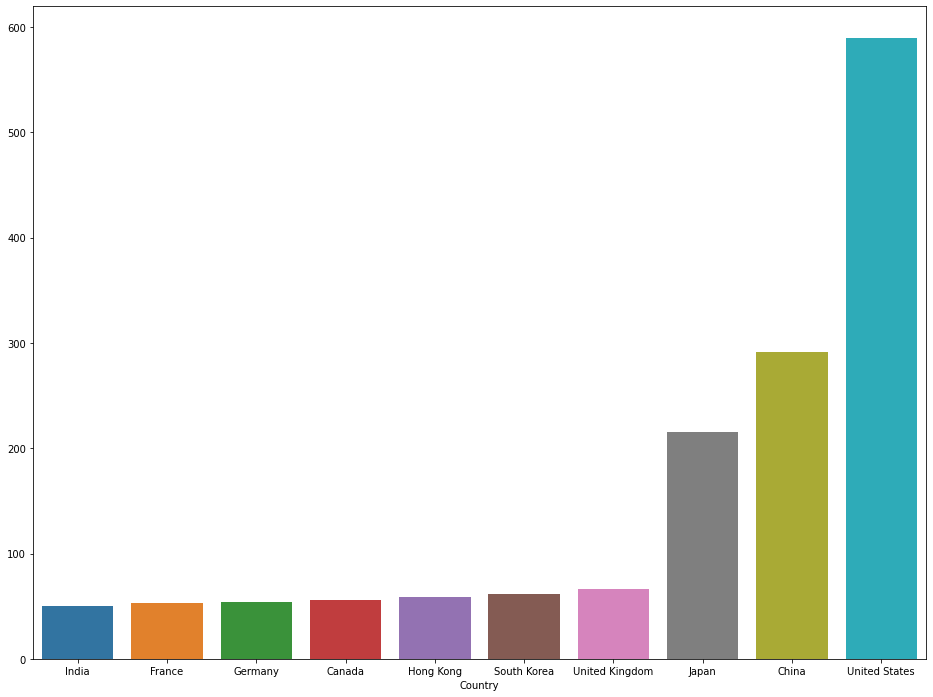

In [18]:
fig, ax = plt.subplots(figsize=(16, 12))
result = dff.groupby(['Country']).size().sort_values()
sns.barplot(x = result.index, y = result.values)

In [19]:
df_india = df[df.Country == 'India']

In [20]:
df_india.shape

(50, 7)

In [21]:
df_india[['Name','Sales','Profit','Market_Value']].head(10)

,Name,Sales,Profit,Market_Value
55,Reliance Industries,61.2,5.7,164.9
109,State Bank of India,50.6,3.1,40.8
115,HDFC Bank,20.7,4.1,105.9
181,ICICI Bank,21.3,2.0,52.7
219,HDFC,16.2,2.4,62.4
321,Tata Consultancy Services,22.1,4.4,158.9
365,Larsen & Toubro,17.8,2.1,25.7
446,Kotak Mahindra Bank,7.5,1.3,47.1
491,Infosys,13.5,2.6,77.5
512,NTPC,15.1,1.6,13.4


In [22]:
df_india[['Name','Sales','Profit','Market_Value']].tail(10)

,Name,Sales,Profit,Market_Value
1619,Bajaj Auto,3.5,628.7,14.2
1625,Rajesh Exports,32.6,111.0,2.0
1641,Tech Mahindra,5.1,560.0,13.2
1710,IndusInd Bank,4.8,312.9,8.8
1879,Ruchi Soya Industries,1.9,1.1,2.6
1918,Sun Pharma Industries,4.5,325.1,20.8
1923,LIC Housing Finance,2.7,372.2,2.7
1945,Vodafone Idea,5.9,-6.6,3.4
1957,Central Bank of India,3.6,-167.1,1.4
1966,Avenue Supermarts,3.1,129.1,25.4
